In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\gloam\AppData\Local\Temp\ipykernel_7780\3370281854.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

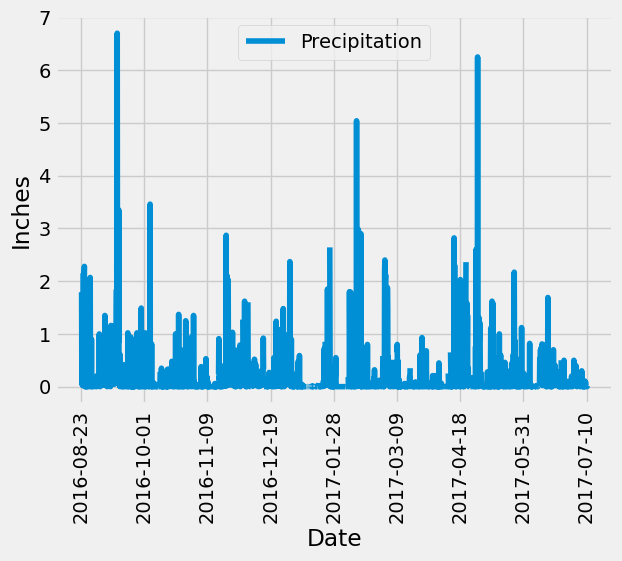

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >="2016-08-23").filter(measurement.date <= "2017-07-10").all()

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,1813.000000
mean,0.183183
std,0.471070
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(func.count(station.station)).all()
stations_count

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurement.station, func.count(measurement.station))\
                    .group_by(measurement.station)\
                    .order_by(func.count(measurement.station).desc()).all()

#Print query
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#New query capturing most active stations
mostly_active_stations = session.query(measurement.station, func.count(measurement.station)).\
                            order_by(func.count(measurement.station).desc()).\
                            order_by(measurement.station).first()

#Create dataset
mostly_active_id = mostly_active_stations[0]
mostly_active_id

#lowest, highest, average temperature
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station==mostly_active_id).all()
print(lowest_temp)

highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station==mostly_active_id).all()
print(highest_temp)

average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station==mostly_active_id).all()
print(average_temp)

[(56.0,)]
[(87.0,)]
[(74.55323054331865,)]


In [15]:
#Use most active ID to create query capturing station ID, tobs and filter by date. 
tobs_station = session.query(measurement.station, measurement.tobs).\
                    filter(measurement.date > '2016-08-23').\
                    filter(measurement.date <= '2017-08-23').\
                    filter(measurement.station == 'USC00519281').all()

tobs_station

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

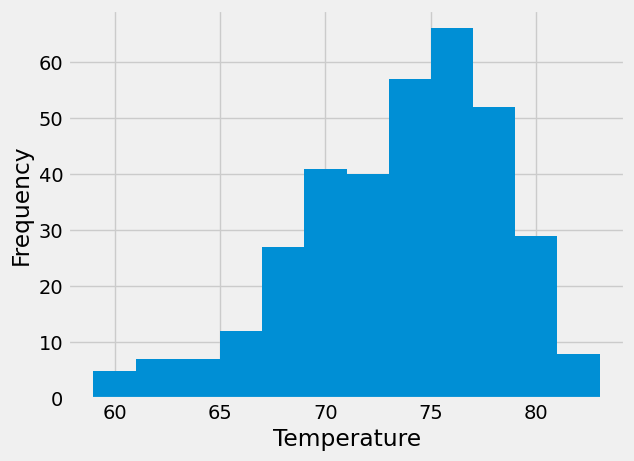

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lasttwelve_temp_df = pd.DataFrame(tobs_station, columns=['Station', 'Temp'])
lasttwelve_temp_df

#chart with labels
lasttwelve_temp_df['Temp'].hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Close Session
session.close()